In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла Excel
df = pd.read_excel('Sale_data_final.xlsx')

# Просмотр первых нескольких строк данных
df




,Id заказа,Учетный день,День+время,"Погода, Celsius",День недели,Является ли день выходным/прадником?,час,Тип оплаты,Тип скидки,Группа блюда 2-го уровня,Блюдо,"Сумма со скидкой, р.","Сумма скидки, р."
0,1,2022-03-27,27.03.2022 14:00:00,-4.0,Sunday,1,14,Безналичная оплата (автономная),NaN,NaN,- здесь,0.0,0.0
1,1,2022-03-27,27.03.2022 14:00:00,-4.0,Sunday,1,14,Безналичная оплата (автономная),NaN,Добавки,- доп шот эспрессо,50.0,0.0
2,1,2022-03-27,27.03.2022 14:00:00,-4.0,Sunday,1,14,Безналичная оплата (автономная),NaN,Кофейная классика,Капучино Medium альт,328.0,0.0
3,1,2022-03-27,27.03.2022 14:00:00,-4.0,Sunday,1,14,Безналичная оплата (автономная),NaN,Растительное молоко,- банановое молоко,0.0,0.0
4,1,2022-03-27,27.03.2022 14:00:00,-4.0,Sunday,1,14,Безналичная оплата (автономная),NaN,Сиропы,- сироп личи 10 мл,20.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79897,30771,2022-11-08,08.11.2022 16:00:00,5.0,Tuesday,0,16,(без оплаты),Оплата бонусами,Вкусы брауни BG,- с фундуком,0.0,0.0
79898,30771,2022-11-08,08.11.2022 16:00:00,5.0,Tuesday,0,16,(без оплаты),Оплата бонусами,Кофейная классика,Капучино Medium,0.0,249.0
79899,30771,2022-11-08,08.11.2022 16:00:00,5.0,Tuesday,0,16,(без оплаты),Оплата бонусами,Сиропы,- сироп мятный 10 мл,0.0,20.0
79900,30772,2022-11-08,08.11.2022 16:00:00,5.0,Tuesday,0,16,(без оплаты),Оплата бонусами,NaN,Пирожное картошка в асс BG,0.0,139.0


In [ ]:
# Анализ данных
# Пример: подсчет общего количества заказов
total_orders = df['Id заказа'].unique()
print("Общее количество заказов:", total_orders)



Общее количество заказов: [    1     2     3 ... 30770 30771 30772]


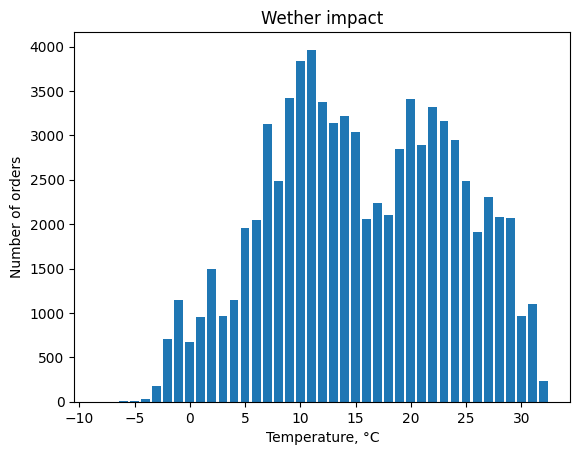

In [ ]:
# Выбор нужных полей
weather_sales = df[['Учетный день', 'День+время', 'Погода, Celsius', 'Сумма со скидкой, р.']]

# Группировка данных по погоде
weather_grouped = weather_sales.groupby('Погода, Celsius').size()

# Визуализация данных
plt.bar(weather_grouped.index, weather_grouped.values)
plt.xlabel('Temperature, °C')
plt.ylabel('Number of orders')
plt.title('')
plt.show()

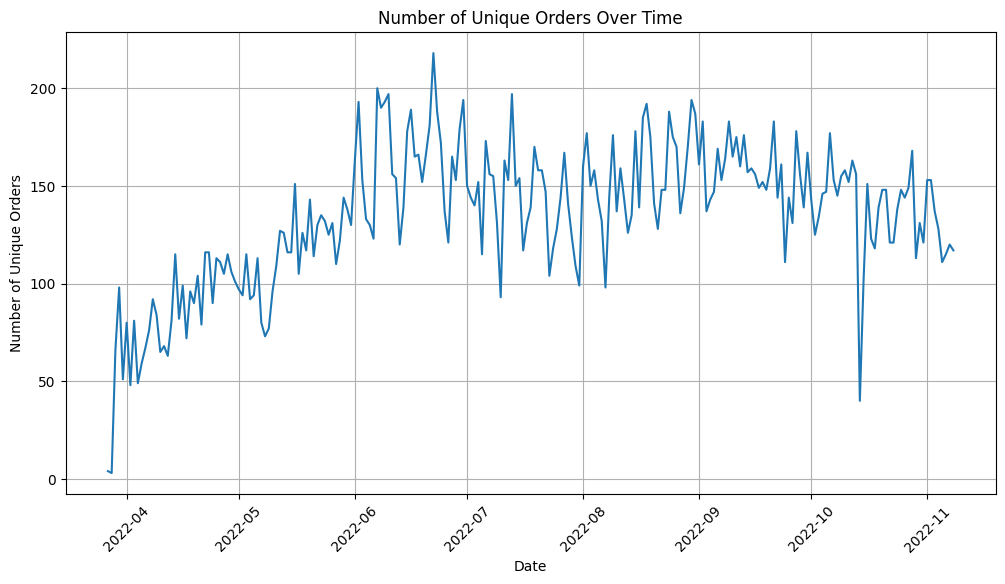

In [ ]:
df["Учетный день"] = pd.to_datetime(df["Учетный день"], format="%d.%m.%Y")

# Group orders by date and count the number of unique orders per day
daily_orders = data.groupby(["Учетный день"])["Id заказа"].nunique()

# Plot the number of orders over time
plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values)
plt.xlabel("Date")
plt.ylabel("Number of Unique Orders")
plt.title("Number of Unique Orders Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

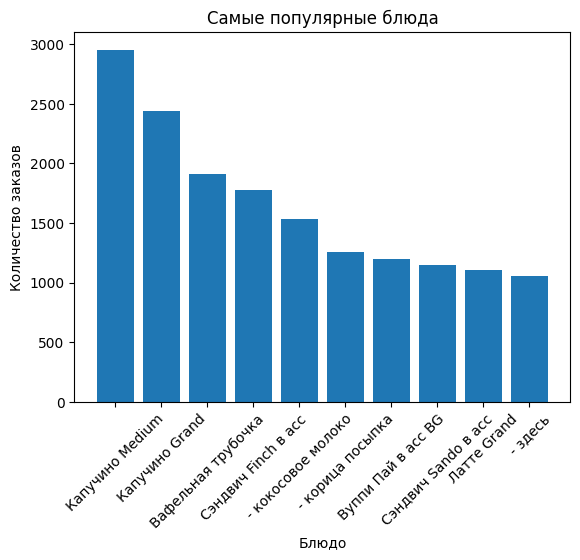

In [ ]:
# Выбор нужных полей
food_sales = df[['Учетный день', 'Группа блюда 2-го уровня', 'Блюдо', 'Сумма со скидкой, р.']]

# Группировка данных по блюдам
food_grouped = food_sales.groupby('Блюдо').size().nlargest(10)

# Визуализация данных
plt.bar(food_grouped.index, food_grouped.values)
plt.xlabel('Блюдо')
plt.ylabel('Количество заказов')
plt.title('Самые популярные блюда')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Выбор нужных полей
combo_sales = df[['Id заказа', 'Группа блюда 2-го уровня', 'Блюдо', 'Сумма со скидкой, р.']]

# Группировка данных по комбинациям в рамках одного чека
combo_grouped = combo_sales.groupby(['Id заказа', 'Группа блюда 2-го уровня']).size().reset_index(name='Количество заказов')

# Сортировка по убыванию количества заказов
combo_grouped = combo_grouped.sort_values(by='Количество заказов', ascending=False)

# Вывод топ-10 связок
top_combos = combo_grouped.head(10)
print(top_combos)

       Id заказа Группа блюда 2-го уровня  Количество заказов
15964       7111      Растительное молоко                   2
40762      18285        Кофейная классика                   2
60429      27387              Сэндвичи FM                   2
50833      22913              Сэндвичи FM                   2
50270      22645                 Раф кофе                   2
18353       8205                   Сиропы                   2
18351       8205        Кофейная классика                   2
18350       8205                  Добавки                   2
17271       7706        Кофейная классика                   2
15087       6721            Холодный кофе                   2


<ipython-input-11-85fc11deaa24>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['День недели'] = label_encoder.fit_transform(features['День недели'])
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change f

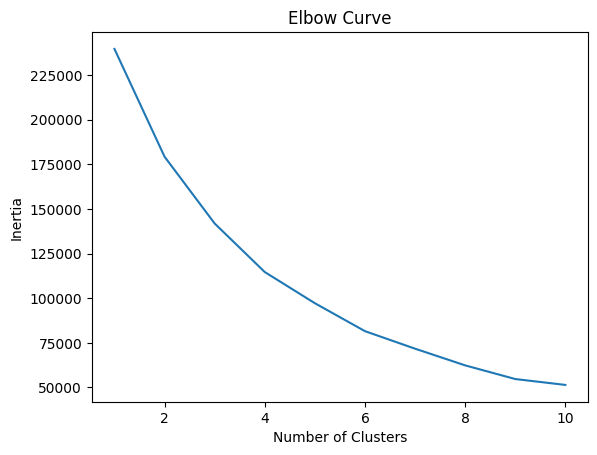

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


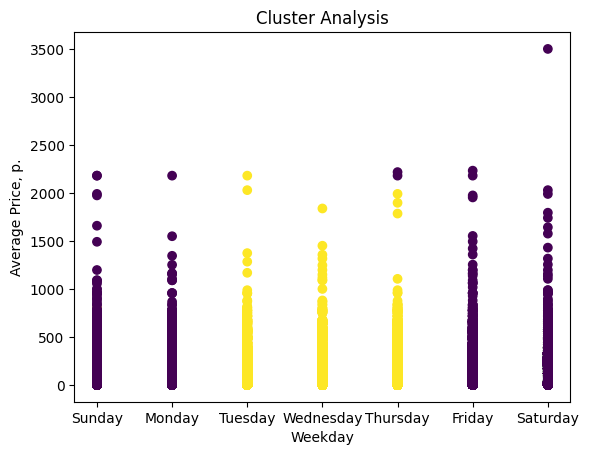

In [ ]:
# Select relevant features for clustering
features = df[['Учетный день', 'День недели', 'Сумма со скидкой, р.']]

# Preprocess the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Choose the optimal number of clusters based on the elbow curve
n_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=17)
kmeans.fit(scaled_features)

# Assign clusters to the data points
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(data['День недели'], data['Сумма со скидкой, р.'], c=data['Cluster'])
plt.xlabel('Weekday')
plt.ylabel('Discounted Price, р.')
plt.title('Cluster Analysis')
plt.show()

In [26]:
list(df.columns.values )

['Id заказа',
 'Учетный день',
 'День+время',
 'Погода, Celsius',
 'День недели',
 'Является ли день выходным/прадником?',
 'Кассир',
 'час',
 'Карта лояльности',
 'Тип оплаты',
 'Тип скидки',
 'Группа блюда 2-го уровня',
 'Блюдо',
 'Сумма со скидкой, р.',
 'Сумма скидки, р.']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


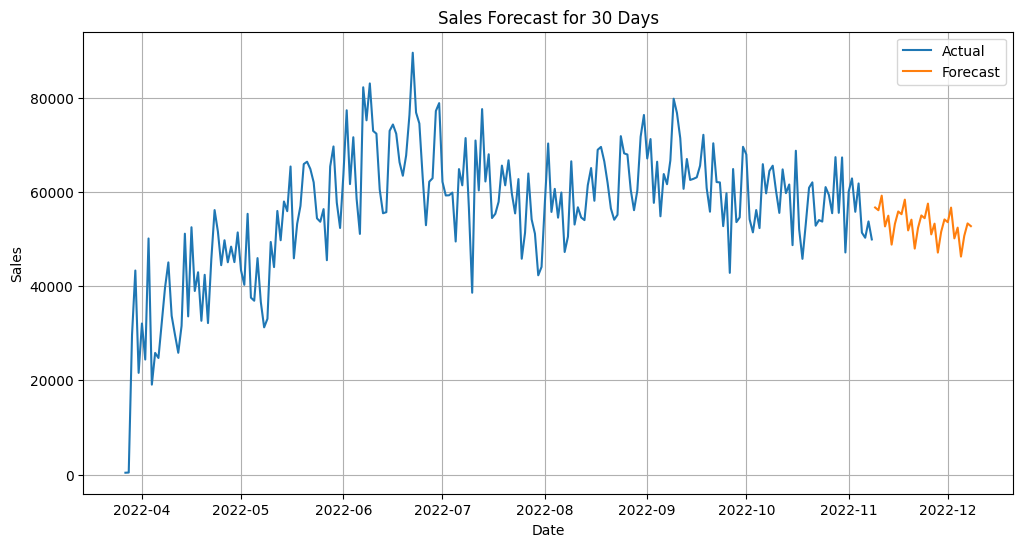

2022-11-09    56682.568233
2022-11-10    56104.704825
2022-11-11    59192.328391
2022-11-12    52664.143543
2022-11-13    54944.507521
2022-11-14    48806.199239
2022-11-15    53211.570525
2022-11-16    55837.437119
2022-11-17    55259.573710
2022-11-18    58347.197276
2022-11-19    51819.012429
2022-11-20    54099.376406
2022-11-21    47961.068125
2022-11-22    52366.439411
2022-11-23    54992.306004
2022-11-24    54414.442596
2022-11-25    57502.066162
2022-11-26    50973.881314
2022-11-27    53254.245292
2022-11-28    47115.937010
2022-11-29    51521.308296
2022-11-30    54147.174890
2022-12-01    53569.311481
2022-12-02    56656.935047
2022-12-03    50128.750200
2022-12-04    52409.114177
2022-12-05    46270.805896
2022-12-06    50676.177182
2022-12-07    53302.043775
2022-12-08    52724.180367
Freq: D, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convert "Учетный день" column to datetime format
df["Учетный день"] = pd.to_datetime(df["Учетный день"], format="%d.%m.%Y")

# Group the data by date and calculate the total daily sales
daily_sales = df.groupby("Учетный день")["Сумма со скидкой, р."].sum()

# Create the time series with a frequency
time_series = daily_sales.asfreq("D")

time_series = time_series.to_frame()


# Fit the ETS model
model = ExponentialSmoothing(time_series, seasonal_periods=7, trend="add", seasonal="add")
fitted_model = model.fit()

# Perform forecasting for 30 days
forecast = fitted_model.forecast(30)

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series["Сумма со скидкой, р."], label="Actual")
plt.plot(forecast.index, forecast, label="Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast for 30 Days")
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
print(forecast)
